# **DATA 3300**
## **ICE - Clustering Analysis**

# Name: Chance Wiese


### Q1
**Load the required packages and then import the dataset**

In [1]:
# install a new library called kneed using pip installer
!pip install kneed

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
# read in the dataframe
df = pd.read_csv("/content/sandp500.csv")
# display a heading
df.head()

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book
0,A,Agilent Technologies Inc,Health Care,51.21,1.02,32.85,1.56,13.35,37.62,52.26,16.49,0.942,3.89,3.84
1,AAL,American Airlines Group,Industrials,44.84,0.85,9.32,4.81,7.46,24.85,50.64,22.61,7.830,0.57,6.07
2,AAP,Advance Auto Parts,Consumer Discretionary,151.99,0.15,24.51,6.20,39.66,132.98,177.83,11.18,1.120,1.19,3.89
3,AAPL,Apple Inc.,Information Technology,139.52,1.63,16.75,8.33,25.19,89.47,140.28,732.00,69.750,3.35,5.53
4,ABBV,AbbVie,Health Care,63.69,4.04,17.55,3.63,2.91,54.41,68.12,101.52,10.950,3.95,21.83


#### 1A
**Before running the actual clustering analysis, you're going to exclude the Symbol and Name variables. Explain why this is important to do:**

These are both primary keys, and therefore won't contribute meaningful information to our analysis.

#### 1B
**Also there would be a problem with keeping all three of Price, 52 Week High, and 52 Week Low involved when the clustering analysis is run. Explain why this is the case.**

In [4]:
df.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Dividend Yield', 'Price/Earnings',
       'Earnings/Share', 'Book Value', '52 week low', '52 week high',
       'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book'],
      dtype='object')

In [5]:
df = df.drop(['Symbol', 'Name', '52 week low', '52 week high', 'Sector'], axis=1) #drop out redundant columns and text columns
# drop missing values
df = df.dropna()

df.head()

,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,Market Cap,EBITDA,Price/Sales,Price/Book
0,51.21,1.02,32.85,1.56,13.35,16.49,0.942,3.89,3.84
1,44.84,0.85,9.32,4.81,7.46,22.61,7.830,0.57,6.07
2,151.99,0.15,24.51,6.20,39.66,11.18,1.120,1.19,3.89
3,139.52,1.63,16.75,8.33,25.19,732.00,69.750,3.35,5.53
4,63.69,4.04,17.55,3.63,2.91,101.52,10.950,3.95,21.83


In [6]:
# switch sector to dummy variables
# df = pd.get_dummies(data = df, drop_first = False)

# df.head()

Because it would be redundant and would overwieght this variable as it counts the same thing three different ways.

### Q2
**Run a clustering analysis in Python to find three groups of similar stocks.**

**Your analysis should address each of the following considerations (pre-processing)**
1. **It should remove variables not to be included in the analysis**
2. **It should normalize all variables using the Z-transformation method**
3. **It should utilize the K-means clustering method**

In [ ]:
# use the standard scaler function
scaler = StandardScaler()
# normalize features
scaled_features = scaler.fit_transform(df)
scaled_features

In [8]:
# add comments to explain the kmeans parameters
kmeans = KMeans(
    init="random",      # init does
    n_clusters=3,       # n_clusters does
    n_init=10,          # n_init does
    max_iter=300,       # max_iter does
    random_state=42     # random_state does
)

In [9]:
kmeans.fit(scaled_features)
# find SSE value or inertia value of the model
kmeans.inertia_

2858.255995389018

### Q3
**Use the Elbow rule to determine the optimal number of clusters between 1-11 by:**
1. **Running k-means iteratively on k of size 1-11**
2. **Plotting the SSE curve by k size**
3. **Using the Knee Locator method**

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
# create empty list for SSE values
for k in range(2,11):       # replace a and b with the range of values for the number of clusters
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

sse

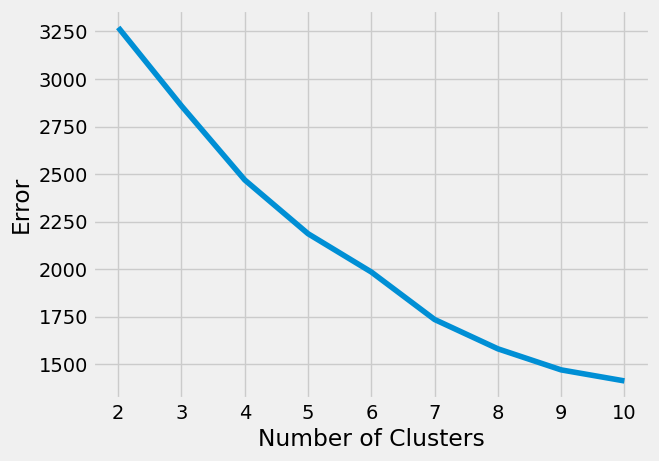

In [11]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sse)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Error")
plt.show()

In [12]:
kl = KneeLocator(
    range(2,11), sse, curve="convex", direction="decreasing"                     # replace a and b with the appropriate values
)

# locate knee/elbow in the plot
kl.elbow

7

### Q4
**Rerun kmeans with the optimal number of clusters and report its SSE value. Is it less than when k was set to 3? Why would this occur?**

In [13]:
# copy down the initial kmeans parameters, what do we need to change to make 5 clusters instead of 3?
kmeans = KMeans(
    init="random",      # init does
    n_clusters=7,       # n_clusters does
    n_init=10,          # n_init does
    max_iter=300,       # max_iter does
    random_state=42     # random_state does
)

In [14]:
kmeans.fit(scaled_features)
kmeans.inertia_

1735.1124862672036

The inertia did decrease by including more clusters. Generally by adding in more clusters leads to having more similar stocks grouped together

### Q5

**Generate a centroid table using the cluster_centers_ feature from kmeans, convert the array into a dataframe. Which cluster of stocks are the highest price on average, how do you know?**

In [ ]:
# save cluster centroids to an object called 'centroids'
centroids = kmeans.cluster_centers_
centroid_table = pd.DataFrame(centroids,
                              columns = df.columns,
                              index =['cl_0','cl_1','cl_2','cl_3','cl_4','cl_5','cl_6'])

# display table
centroid_table

Cluster 6 has the highest average stock prices. We know this because its centroid for price is almost 5x above the average. (4.65)

### Q6

**Now create a new centroid table after de-normalizing the centroid values. Why is it important to de-normalize your centroids after the fact?**

In [ ]:
# de-normalize centroid values from centroids object, called unscaled
unscaled = scaler.inverse_transform(centroids)
unscaled_centroid_table = pd.DataFrame(unscaled,
                              columns = df.columns,
                              index =['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6'])

unscaled_centroid_table #produce a non-scaled centroid table


It's easier to communicate about findings and interpret your clusters when they are in tersm of their natural units (USD)

### Q7
**Explore plotting the centroid values to examine differences between clusters across the different variables of interest. Then come up with a brief descriptive title for each of the 5 clusters of stocks:**

1. **Cluser_0:** Average Joe Performers
2. **Cluster_1:** Low Book Values
3. **Cluster_6:** High Risk, High Reward


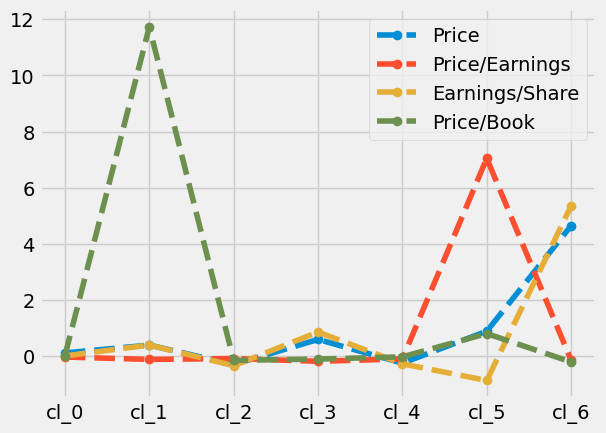

In [20]:
centroid_table.plot(kind = 'line', y = ['Price', 'Price/Earnings', 'Earnings/Share', 'Price/Book'], style = '--', marker = 'o')
plt.show()


### Q8

**Based on your plot and centroid tables, describe which cluster of stocks you'd recommend and why. Create a visualization that supports your recommendation (pull from the data understanding module!). Briefly describe what the viz is showing and why it's relevant.**

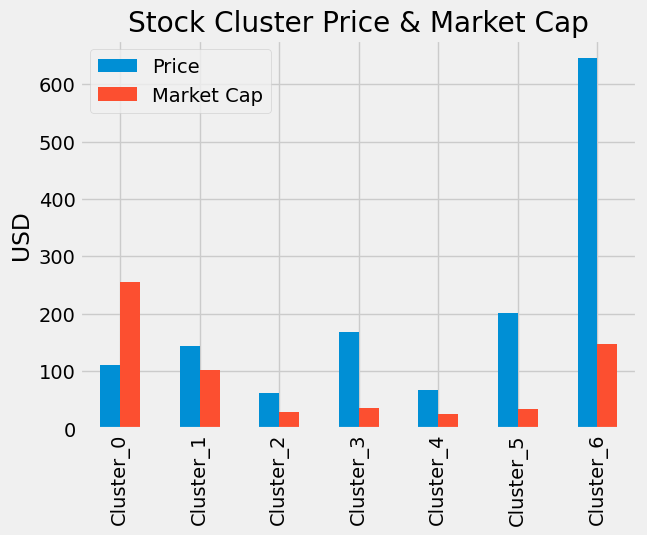

In [22]:
unscaled_centroid_table.plot(kind = 'bar', y = ['Price','Market Cap'])
plt.title("Stock Cluster Price & Market Cap")
plt.ylabel("USD")
plt.show()

Cluster 0 would be the best investment because it has a low price but a higher market cap. High market cap typically represents a bigger company and it's a good price